In [1]:
from helpers import *

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

In [3]:
xgb, params = getModelAndBestParams(X_log_train, y_log_train, 10)

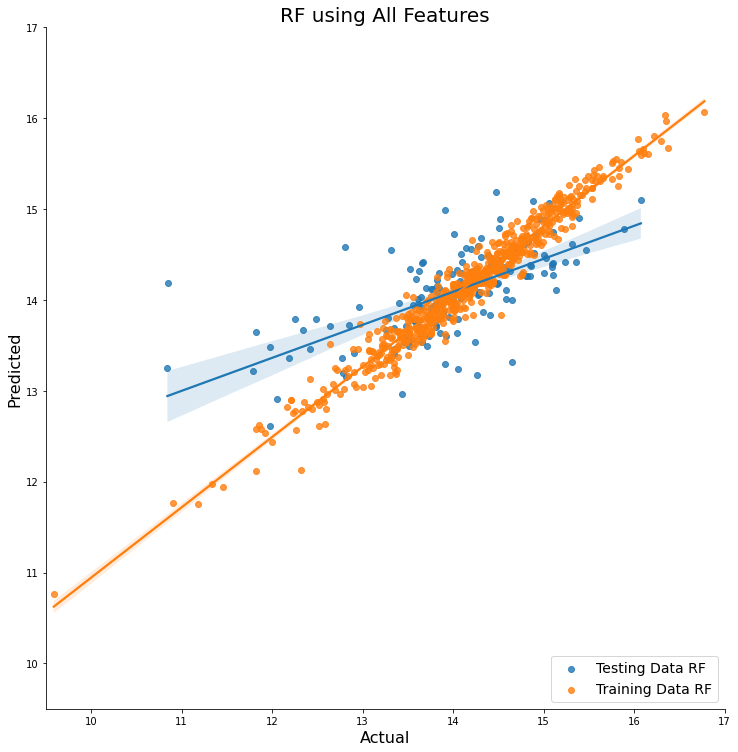

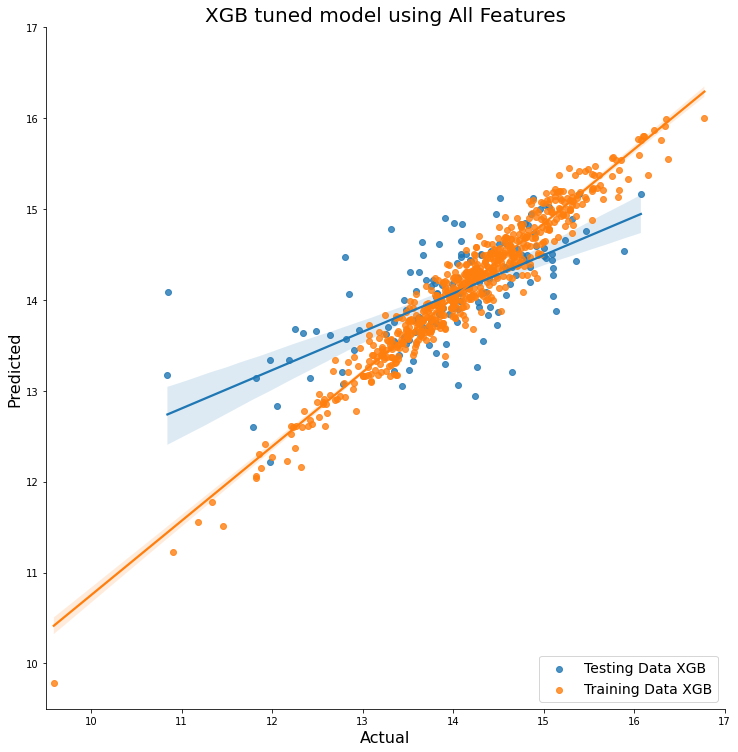

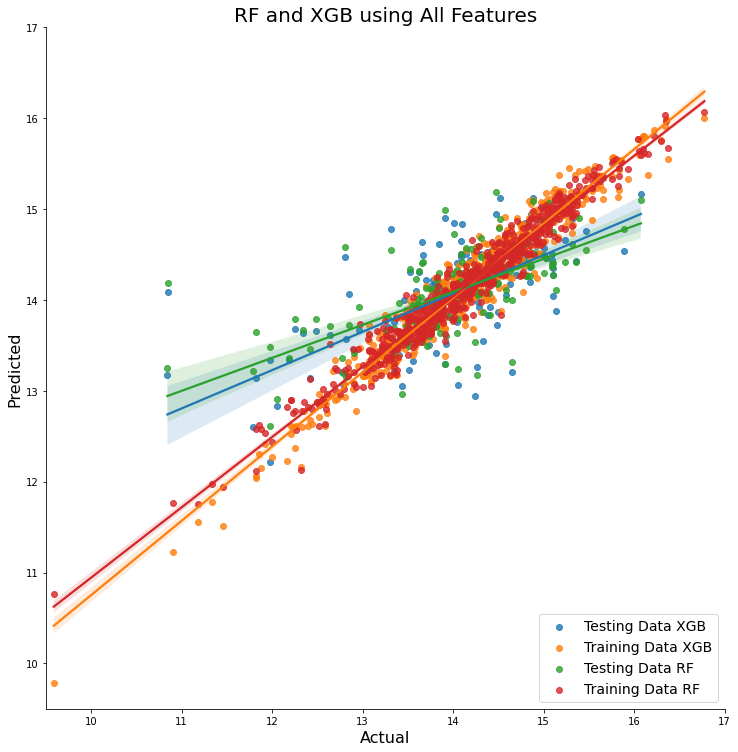

In [4]:
mae = getMAEandPlots(xgb, X_log_train, X_log_test, y_log_train, y_log_test)

In [5]:
X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [6]:
xgb_corr = buildNewModelAndFit(params, X_train_corr, y_log_train)

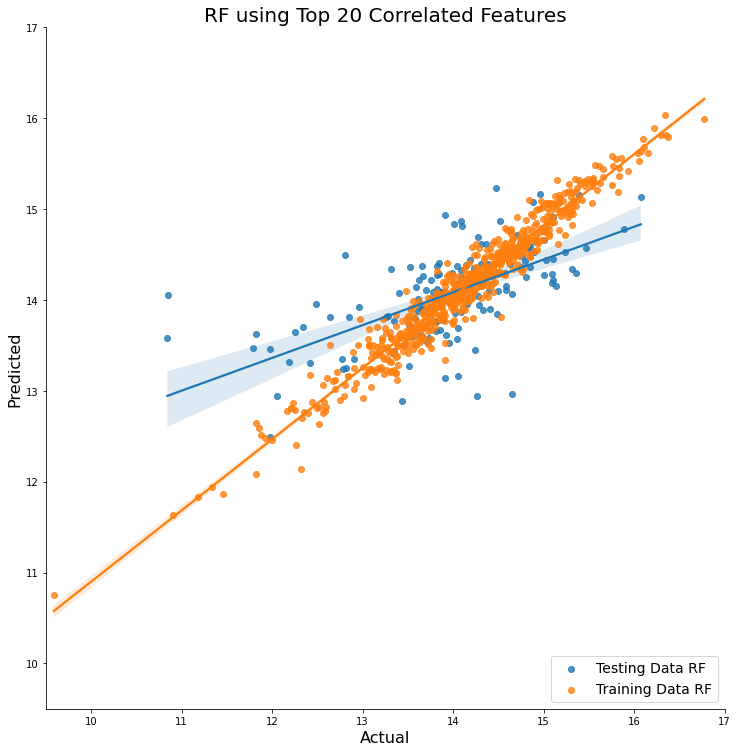

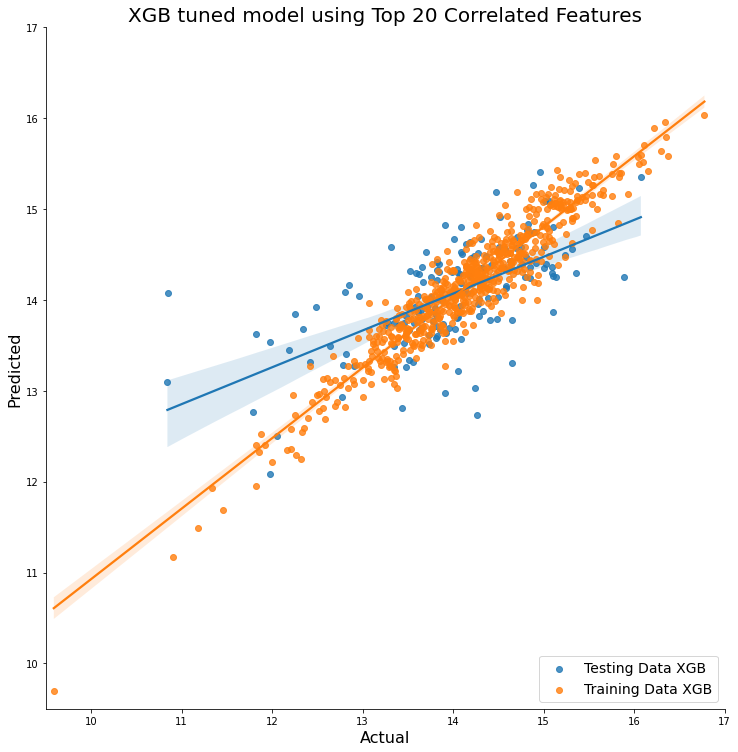

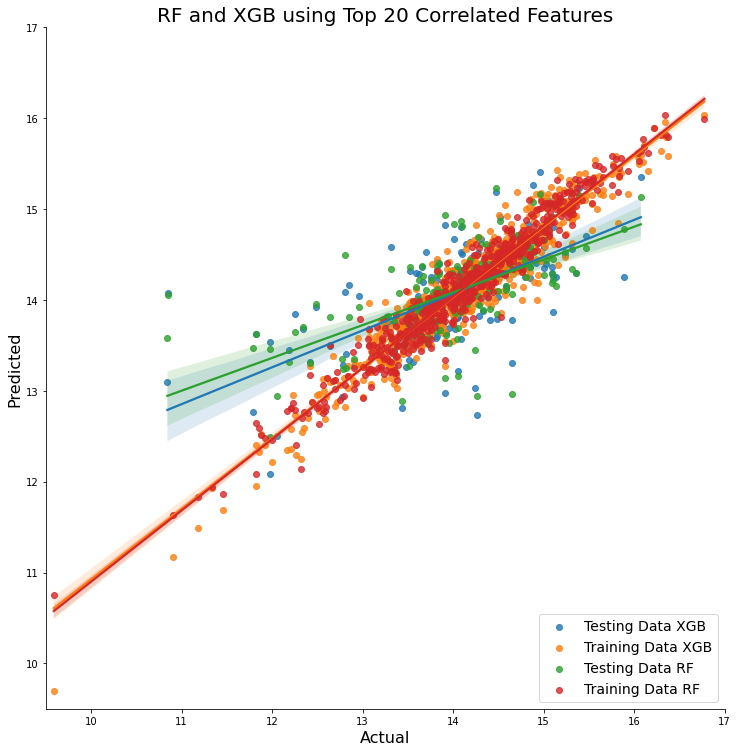

In [7]:
mae_corr = getMAEandPlots(xgb_corr, X_train_corr, X_test_corr, y_log_train, y_log_test, 'Top 20 Correlated Features')

In [8]:
perm_xgb, perm_regr, X_RF_train, X_RF_test, X_XGB_train, X_XGB_test = permImportance(params, X_log_train, X_log_test, y_log_train, y_log_test)

In [9]:
xgb_RF_perm = buildNewModelAndFit(params, X_RF_train, y_log_train)

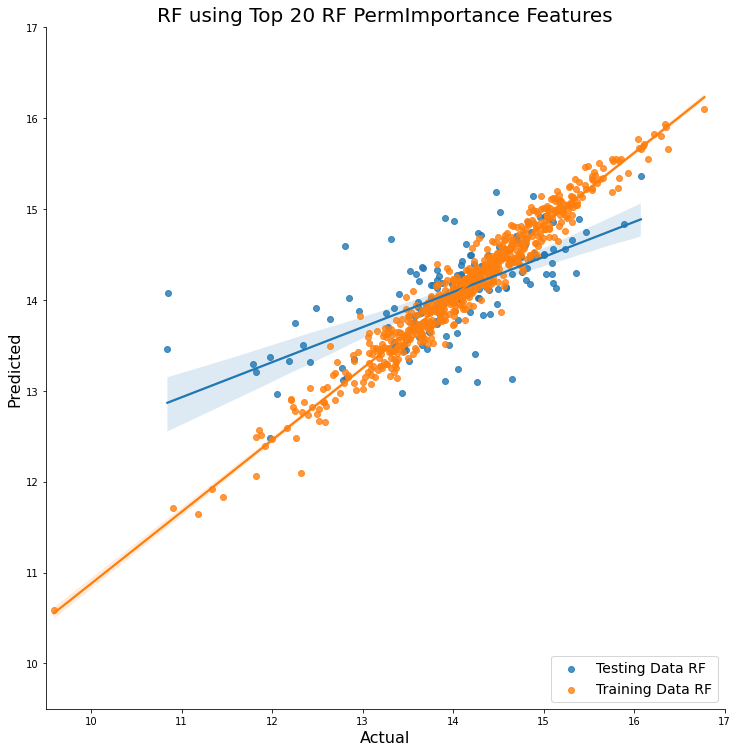

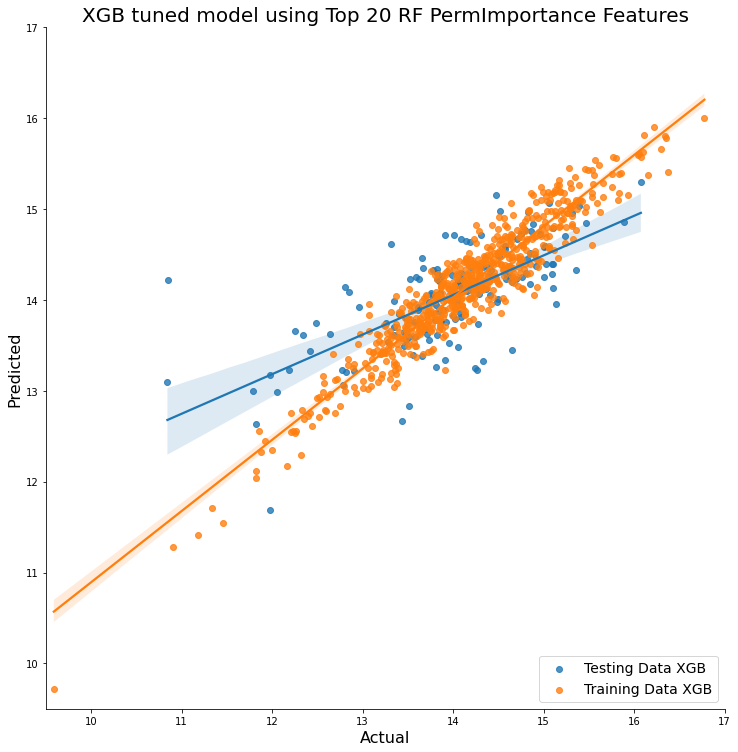

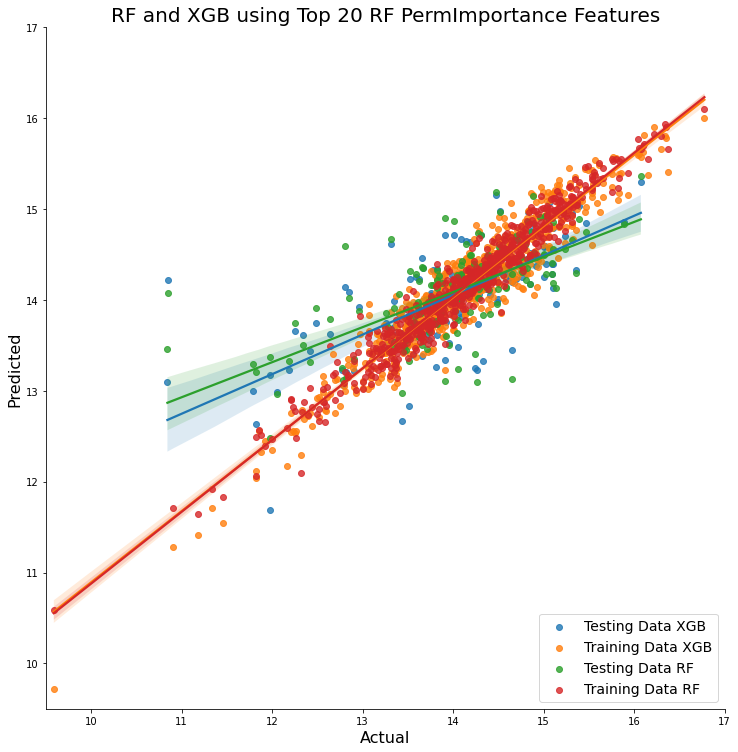

In [10]:
mae_RF_perm = getMAEandPlots(xgb_RF_perm, X_RF_train, X_RF_test, y_log_train, y_log_test, 'Top 20 RF PermImportance Features')

In [11]:
xgb_XGB_perm = buildNewModelAndFit(params, X_XGB_train, y_log_train)

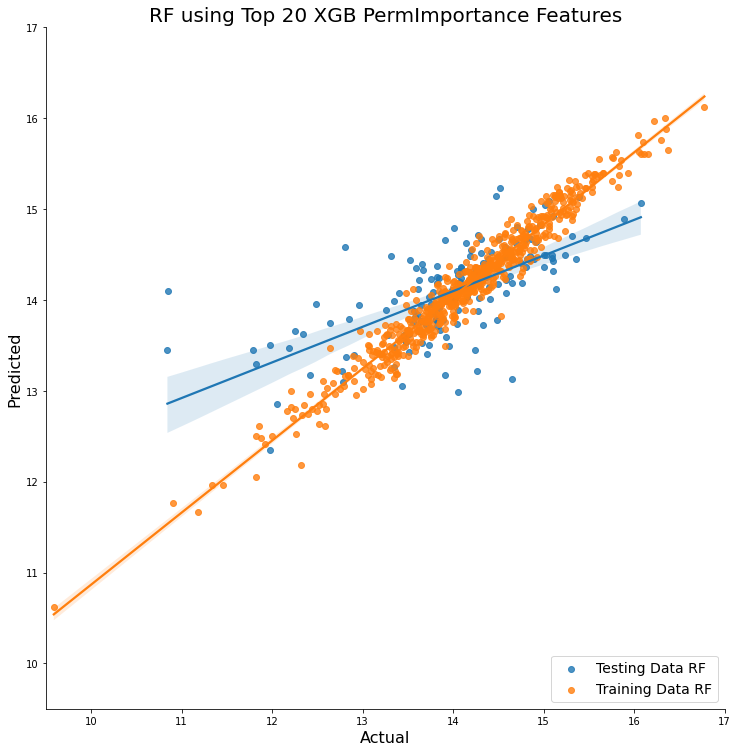

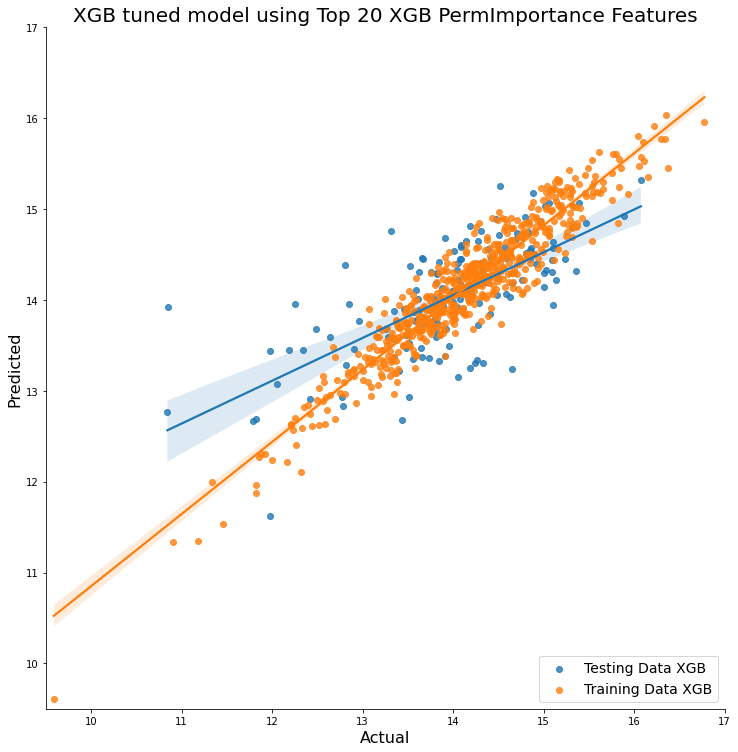

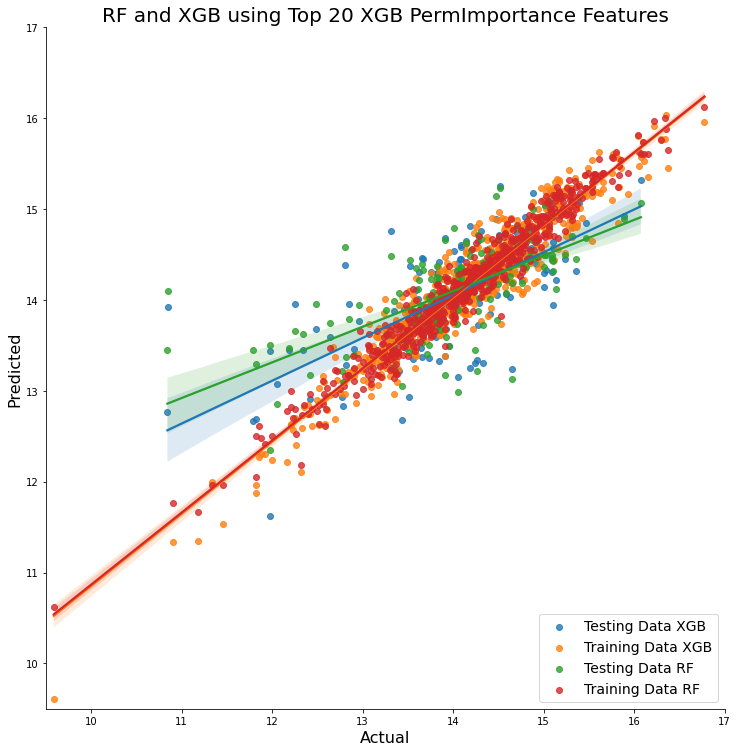

In [12]:
mae_XGB_perm = getMAEandPlots(xgb_XGB_perm, X_XGB_train, X_XGB_test, y_log_train, y_log_test, 'Top 20 XGB PermImportance Features')

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CD38 expression in cells')

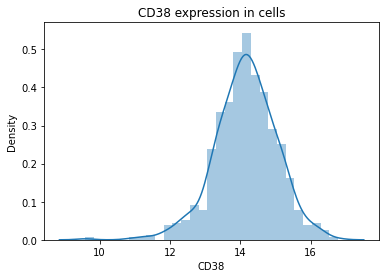

In [13]:
sns.distplot(y_log_train)
plt.title("CD38 expression in cells")

<AxesSubplot:ylabel='GENE_NAMES'>

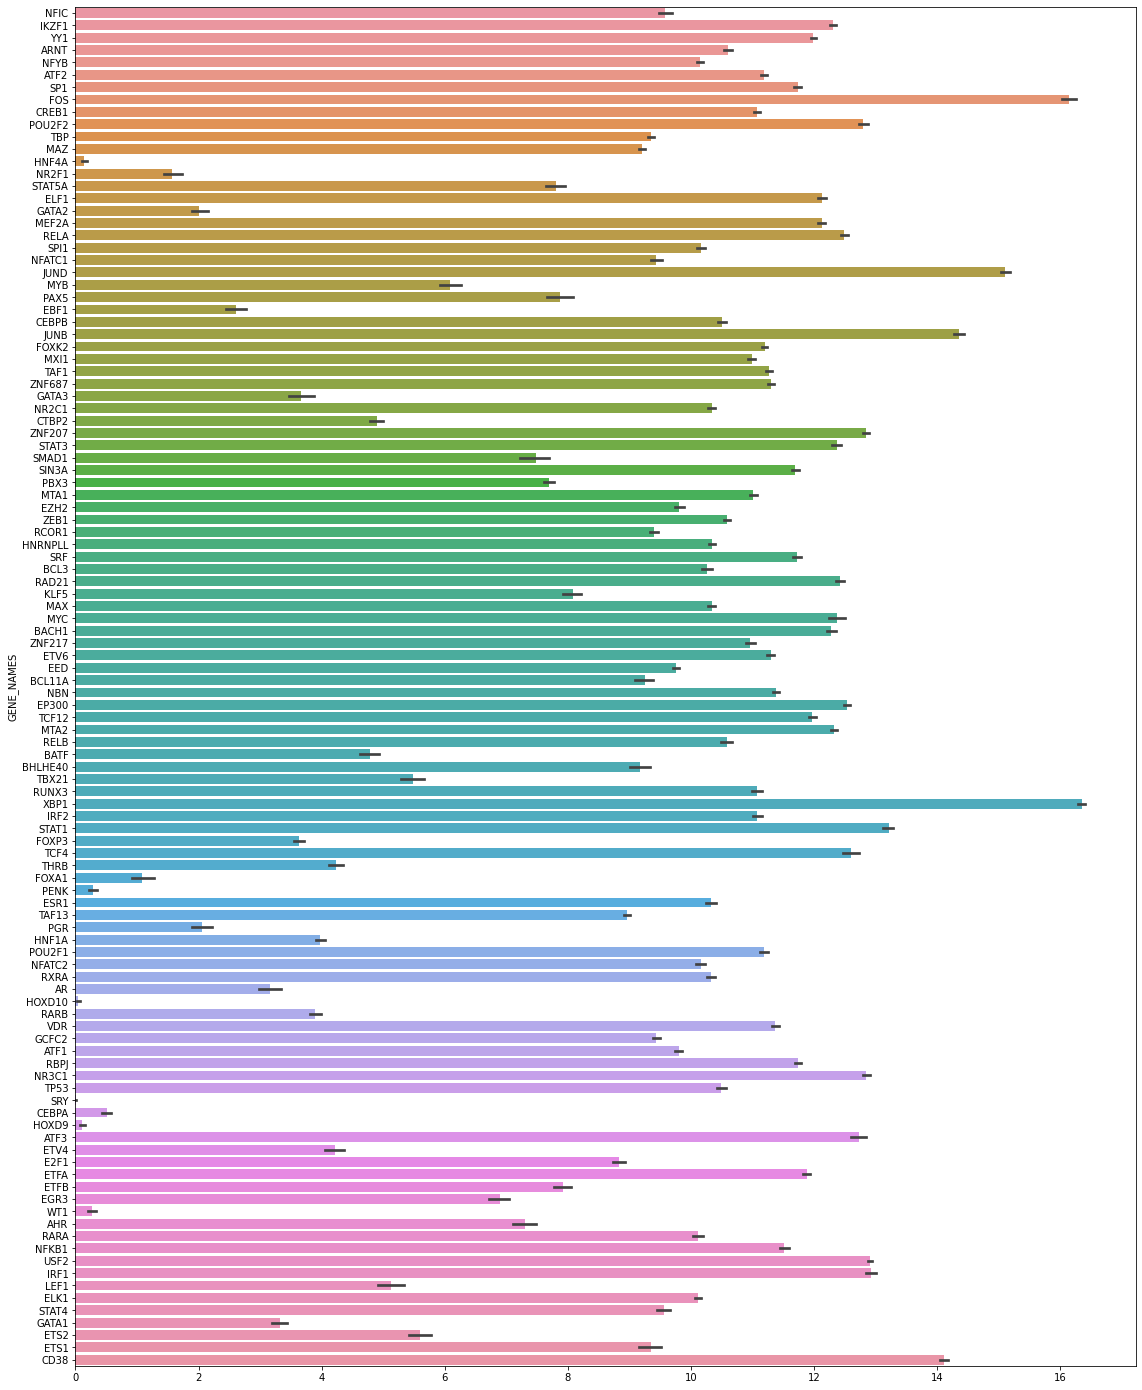

In [14]:
plt.figure(figsize=(19,25))

sns.barplot(data=goi_pat_log, orient = 'h')#, hue = 'corp')